# pandas 데이터 합치기

- **pandas는 두 개 이상의 데이터를 하나로 통합**


- 통합 방법 : **연결(concate)** 이나 **병합(merge)** 을 지원
     - 세로로 증가하는 방향(위, 아래)으로 통합 : 행 결합(row bind)
     - 가로로 증가하는 방향으로 통합 : 열결합(column bind)
     - 특정 열 기준으로 통합
     

- concat(), merge(), join()

In [1]:
# 필요 모듈
import pandas as pd
import numpy as np
import random

In [2]:
# 여러 변수 출력 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## 1. 데이터 연결

### concat()을 사용한 데이터 연결

형식. **pd.concat([left, right,...], axis=0,** join='outer', ignore_index=False, keys=None)

- left, right :  Series, DataFrame, Panel object 리스트
- axis :  0은 위+아래로 합치기, 1은 왼쪽+오른쪽으로 합치기
- join :  'outer': 합집합(union), 'inner': 교집합(intersection)
- ignore_index :  False: 기존 index 유지, True: 기존 index 무시
- keys :  계층적 index 사용하려면 keys 튜플 입력

기준열 없이 데이터를 합친다
- 위 아래로 데이터를 결합하는 **행 결합(row bind)**이 기본
- axis 속성을 1로 설정하면 열 결합(column bind)을 수행
- 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 **인덱스 값이 중복**될 수 있다.

**참고**. pandas 1.4.0 이전 버전에서는 concat() 대신에 append() 사용

#### 행결합 (세로방향으로 통합)

- column이 같은 두 데이터를 세로 방향(index 증가 방향)으로 통합

- 형식.
    - pd.concat([left,right], axis=0, ...)
    - left.concat(right, axis=0, join='outer', ...)

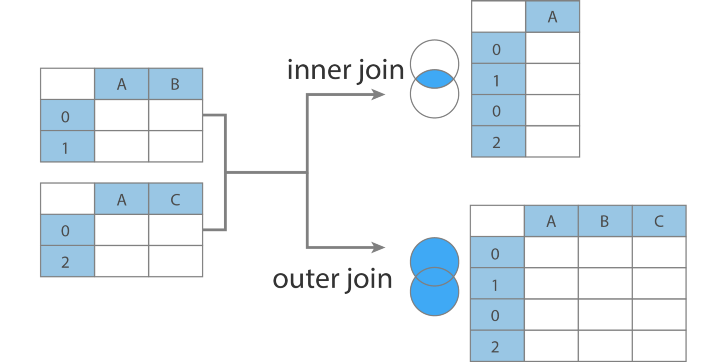

#### 열결합 (가로방향으로 통합)

- 두 데이터를 가로 방향(column 증가 방향)으로 통합

- 형식.
    - pd.concat([left,right], axis=1, ...)
    - left.concat(right, axis=1, join='outer', ...)

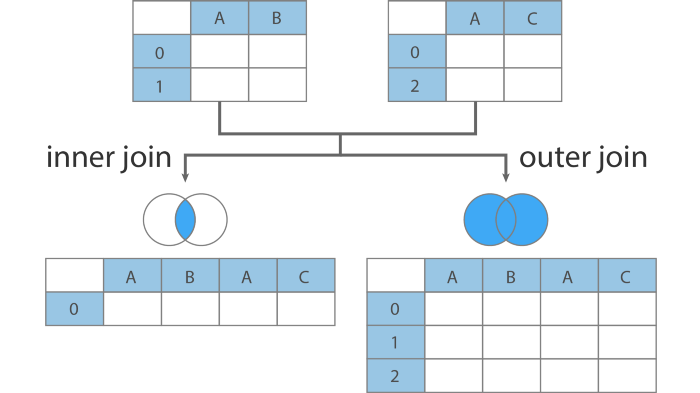

### 1) 두 시리즈 데이터 연결

**예제1.**

- 두 시리즈 데이터 생성

In [4]:
s1 = pd.Series([0,1], index =['A','B'])
s2 = pd.Series([2,3,4], index=list('ABC'))
s1
s2

A    0
B    1
dtype: int64

A    2
B    3
C    4
dtype: int64

- 두 시리즈 데이터 연결

In [7]:
# 행방향 결합 : 시리즈로 반환
pd.concat([s1,s2])
# pd.concat([s1,s2], axis = 0)

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [10]:
# 열방향 결합 : 데이터프레임으로 반환 (오른쪽)
pd.concat([s1,s2], axis=1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


### 2) 두 데이터프레임 연결

**예제2.**
- 데이터프레임 생성

In [79]:
# concat 연결
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'E': ['C4', 'C5', 'C6', 'C7'],
                    'F': ['D4', 'D5', 'D6', 'D7']},
                   index=[0, 1, 2, 3])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[1, 2, 3, 4])
df1
df2
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,E,F
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


,A,B,C,D
1,A8,B8,C8,D8
2,A9,B9,C9,D9
3,A10,B10,C10,D10
4,A11,B11,C11,D11


#### 데이터 프레임 행 결합

- 행을 모두 표현
- join 인수 생략 : 기본값이 'outer'로 지정되어 있음 (모든 열 표현)

In [12]:
pd.concat([df1,df2])

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


In [13]:
pd.concat([df1,df2], join='outer')   # 합집합

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


In [19]:
result = pd.concat([df1,df2], axis=0, join='outer')
result

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


**인덱스가 중복된 경우 : 인덱싱을 수행하면?**

In [20]:
result

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


In [22]:
result.loc[0]

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4


**인덱스가 중복되므로 기본 인덱스로 재설정**
- 인덱스 열 제거 : drop=True

In [77]:
result.reset_index(drop=True)

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
4,A4,B4,NaN,NaN,C4,D4
5,A5,B5,NaN,NaN,C5,D5
6,A6,B6,NaN,NaN,C6,D6
7,A7,B7,NaN,NaN,C7,D7


### 3) concat( , join = 'inner')

: 공통된 열만 표현

In [16]:
pd.concat([df1,df2], join='inner')    # 교집합

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


### 4) concat( , ignore_index = True)

: 기존 인덱스 제거 후 제로베이스 인덱스 설정

In [80]:
pd.concat([df1, df2], join='inner', ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7


### 5) concat( , keys=[])

: 상위 레벨 인덱스 설정

In [29]:
result2 = pd.concat([df1,df2,df3], keys=['x','y','z'])
result2

A    B    C    D    E    F
x 0   A0   B0   C0   D0  NaN  NaN
  1   A1   B1   C1   D1  NaN  NaN
  2   A2   B2   C2   D2  NaN  NaN
  3   A3   B3   C3   D3  NaN  NaN
y 0   A4   B4  NaN  NaN   C4   D4
  1   A5   B5  NaN  NaN   C5   D5
  2   A6   B6  NaN  NaN   C6   D6
  3   A7   B7  NaN  NaN   C7   D7
z 1   A8   B8   C8   D8  NaN  NaN
  2   A9   B9   C9   D9  NaN  NaN
  3  A10  B10  C10  D10  NaN  NaN
  4  A11  B11  C11  D11  NaN  NaN

**다중 인덱스인 경우 데이터 접근
: .연산자를 이용한 체인 인덱싱**

In [28]:
result2.loc['x'].loc[1:2]

,A,B,C,D,E,F
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN


### 6) concat()을 이용한 열 결합

**pd.concat([df1,df2], axis=1, join='inner/outer')**

- axis=1
    - 데이터프레임들의 열을 결합


- join='outer' : 기본 설정
    - 모든 행을 표시하고 해당 행의 데이터가 없는 열의 원소는 NaN으로 표시


- join='inner'
    - 병합하는 데이터프레임에 중복되는 인덱스의 행만 표시

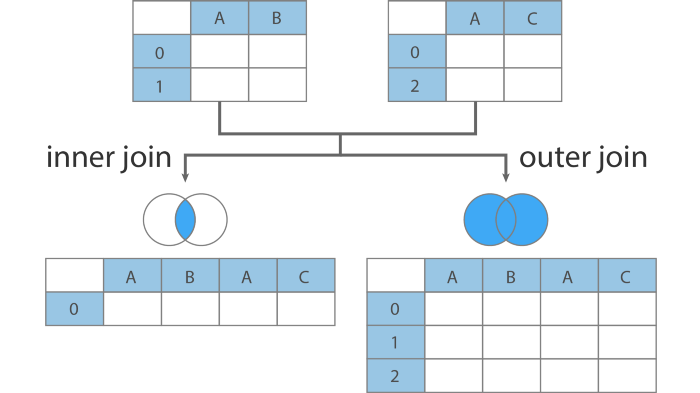

**예제3.**

In [31]:
# 예제 df 생성
df1=pd.DataFrame(np.arange(6).reshape(3,2),
                 index=['a','b','c'],
                 columns=['데이터1','데이터2']
)
df1

df2=pd.DataFrame(np.arange(5,9).reshape(2,2),
                 index=['a','c'],
                 columns=['데이터2','데이터4']
)
df2

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


,데이터2,데이터4
a,5,6
c,7,8


#### concat( , axis=1, )을 이용한 열 결합 : outer join이 기본으로 적용

In [32]:
pd.concat([df1, df2], axis=1)

,데이터1,데이터2,데이터2,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


#### inner join이 적용된 열 결합

In [33]:
pd.concat([df1, df2], axis=1, join = 'inner')

,데이터1,데이터2,데이터2,데이터4
a,0,1,5,6
c,4,5,7,8


In [34]:
pd.concat([df1, df2], axis=1, join = 'inner').rename({'데이터2':'데이터3'}, axis=1)

,데이터1,데이터3,데이터3,데이터4
a,0,1,5,6
c,4,5,7,8


In [36]:
pd.concat([df1, df2], axis=1, keys=['X','Y'])

X         Y     
  데이터1 데이터2 데이터2 데이터4
a    0    1  5.0  6.0
b    2    3  NaN  NaN
c    4    5  7.0  8.0

------------------------------------------

## 2. merge()를 이용한 병합

- 두 데이터의 공통 열(column)또는 인덱스(index)를 기준으로 데이터들을 통합

형식1.**pandas.merge**(left_df, right_df, how, on, left_on, right_on, left_index, right_index,...)

형식2.**left_df.merge**(right_df, how='inner', on, left_on, right_on, left_index, right_index, ...)

- left_df : 왼쪽 데이터프레임
      
- right_df : 오른쪽 데이터프레임
   
- how : 병합 방식
     - **'left'**: use only keys from left frame (left outer join)
     - **'right'**: use only keys from right frame (right outer join)
     - **'outer'**: use union of keys from both frames (full outer join)
     - **'inner'**: use intersection of keys from both frames, preserves the order of the left keys. (inner join)
     - **'cross'**: creates the cartesian product from both frames, preserves the order of the left keys.

- on : 조인을 위한 컬럼 또는 인덱스 라벨 또는 리스트

- 기본은 inner join : 양쪽에 동일하게 존재하는 키만 표시
- key : 기준열을 의미
    -  실제 데이터 필드거나 행 인덱스 일 수 있다

**SQL의 join 방식**

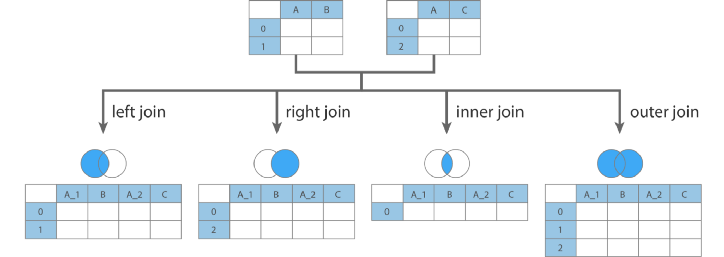

### 1) 두 데이터프레임의 병합(merge)

**예제4.**

In [44]:
# 예. 고객정보 데이터프레임
df1 = pd.DataFrame({'고객번호':[1001,1002,1003,1004,1005,1006,1007],
                   '이름':['둘리','도우너','또치','길동','희동','마이콜','영희']},
                   columns=['고객번호','이름'])
df1

# 예. 예금 정보 데이터프레임
df2 = pd.DataFrame({'고객번호':[1001,1001,1005,1006,1008,1001],
                    '금액':[10000, 20000,15000, 5000, 100000, 30000]},
                     columns=['고객번호','금액'])
df2

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


#### ① df1.merge(df2)

- 기준 데이터프레임은 df1
- 모든 인수 생략(병합 df를 제외한) 공통 이름을 갖고 있는 열
- '고객번호'가 키가 됨
- 양쪽에 모두 존재하는 키의 data만 보여주는 **`inner join`** 방식을 사용

In [38]:
df1.merge(df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [39]:
df2.merge(df1)

,고객번호,금액,이름
0,1001,10000,둘리
1,1001,20000,둘리
2,1001,30000,둘리
3,1005,15000,희동
4,1006,5000,마이콜


#### ② pandas.merge(left_df, right_df)

- 기준 데이터프레임은 왼쪽(left_df)에

In [40]:
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


### 2) merge()의 how 인수를 사용한 다양한 병합

**merge( , how = 'outer')**
- how = inner/outer/left/right
    - how=left : 왼쪽 df에 있는 모든 키의 데이터는 표시
    - how=right : 오른쪽 df 에 있는 모든 키의 데이터는 표시

#### ① full outer join : how='outer' 

- outer join
    - 키 값이 한쪽에만 있어도 데이터를 보여 줌
    - 어느 한 df에 데이터가 존재하지 않으면 NaN으로 표시됨

In [45]:
df1.merge(df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [42]:
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


#### ② left join : how='left' 

- 왼쪽 데이터프레임의 공통 컬럼을 기준으로 조인 

In [43]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


#### ③ right join : how='right' 

- 오른쪽 데이터프레임의 공통 컬럼을 기준으로 조인 

In [46]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


**how='cross'인경우** 

In [47]:
pd.merge(df1, df2, how='cross')

,고객번호_x,이름,고객번호_y,금액
0,1001,둘리,1001,10000
1,1001,둘리,1001,20000
2,1001,둘리,1005,15000
3,1001,둘리,1006,5000
4,1001,둘리,1008,100000
5,1001,둘리,1001,30000
6,1002,도우너,1001,10000
7,1002,도우너,1001,20000
8,1002,도우너,1005,15000
9,1002,도우너,1006,5000


#### 조인을 위한 키의 동일한 값들이 여러개 있는 경우
- 가능한 조합을 모두 생성

**예제5.**

In [48]:
# 예제 df 생성 :
# 열: 품종, 꽃잎길이
df1 = pd.DataFrame({'품종':['setosa','setosa','virginica','virginica'],
                    '꽃잎길이':[1.4, 1.3, 1.5, 1.3]},
                    columns=['품종','꽃잎길이'])
df1

# 열 : 품종, 꽃잎너비
df2 = pd.DataFrame({'품종': ['setosa','virginica','virginica','versicolor'],
                    '꽃잎너비':[0.4,0.3,0.5,0.3]},
                    columns=['품종','꽃잎너비'])
df2

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [49]:
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [54]:
pd.merge(df1, df2, how='outer')

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5
6,versicolor,NaN,0.3


In [52]:
pd.merge(df1, df2, how='left')

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [53]:
pd.merge(df1, df2, how='right')

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.3,0.3
4,virginica,1.5,0.5
5,virginica,1.3,0.5
6,versicolor,NaN,0.3


### 3) merge()의 on 인수

- 두 데이터프레임에 **컬럼명이 같은 컬럼이 여러 개 있는 경우** 병합
- 기준열을 on으로 명시하여 병합

**key**
- 두 데이터 프레임에서 이름이 같은 열은 모두 키가 될 수 있다.
- 열이름이 같아도 키로 사용할 수 없는 열이 있으면 **on 인수로 기준열을 명시**해야 한다.

**예제6.**

In [55]:
# 예제 df
df1 = pd.DataFrame({'고객명':['춘향','춘향','몽룡'],
                    '날짜' : ['2018-01-01','2018-01-02','2018-01-01'],
                    '데이터':[20000, 30000, 100000]})
df1

df2 = pd.DataFrame({'고객명':['춘향','몽룡'],
                    '데이터':['여자','남자']})
df2

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


,고객명,데이터
0,춘향,여자
1,몽룡,남자


#### ① 기준열을 지정하지 않고 병합하기

- 두 데이터프레임에 컬럼명이 같은 컬럼이 여러 개 있는 경우
- 기준열을 지정하지 않고 병합할 경우 오류 발생

In [57]:
# 조인을 위한 컬럼을 명시하지 않아서 오류 발생
# pd.merge(df1, df2)

#### ② 기준열을 직접 지정 : on=기준열 이름

- 반환 결과에 동일 필드명이 있을 경우에는 필드명_x, 필드명_y로 필드명을 변경해서 표현

In [58]:
pd.merge(df1, df2, on='고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


### 4) merge()의 left_on, right_on 인수

- 두 데이터에서 **키가 되는 기준열 이름이 다른 경우**의 병합

- **left_on, right_on 인수**를 사용해서 기준열을 명시해야 함

**예제7.**

In [59]:
df1=pd.DataFrame({'이름' :['영희','철수','철수'],
                  '성적' :[90,80,80]})
df1

df2 = pd.DataFrame({'성명' :['영희','영희','철수'],
                    '성적2':[100,80,90]})
df2

,이름,성적
0,영희,90
1,철수,80
2,철수,80


,성명,성적2
0,영희,100
1,영희,80
2,철수,90


In [61]:
pd.merge(df1, df2, left_on = '이름', right_on = '성명')

,이름,성적,성명,성적2
0,영희,90,영희,100
1,영희,90,영희,80
2,철수,80,철수,90
3,철수,80,철수,90


In [63]:
pd.merge(df1, df2, left_on = '이름', right_on = '성명').drop(labels='성명', axis=1)

,이름,성적,성적2
0,영희,90,100
1,영희,90,80
2,철수,80,90
3,철수,80,90


### 5) merge()의 left_index, right_index 인수

- 두 데이터의 **인덱스를 기준**으로 병합
- left_index = True 또는 right_index = True  설정

#### ① 두 데이터프레임의 인덱스가 키로 사용될 경우

**예제8.**

In [64]:
df1 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],
                   index=['a','c','e'],
                   columns=['서울','부산'])
df1

df2=pd.DataFrame([[7.,8.],[9.,10.],
                  [11.,12.],[13.,14.]],
                 index=['b','c','d','e'],
                 columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [65]:
pd.merge(df1, df2, left_index=True, right_index=True)

,서울,부산,대구,광주
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [66]:
pd.merge(df1, df2, how='outer',left_index=True, right_index=True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [67]:
pd.merge(df1, df2, how='left',left_index=True, right_index=True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [68]:
pd.merge(df1, df2, how='right',left_index=True, right_index=True)

,서울,부산,대구,광주
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#### ② 한 데이터프레임의 컬럼과 다른 데이터프레임의 인덱스를 키로 하여 병합

**예제9.**

In [69]:
df1 = pd.DataFrame({'도시': ['서울','서울','서울','부산','부산'],
                    '연도': [2000, 2005, 2010, 2000, 2005],
                    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

df2=pd.DataFrame(np.arange(12).reshape((6,2)),
                 index=[['부산','부산','서울','서울','서울','서울'],
                        [2000, 2005, 2000, 2005, 2010, 2015]],
                 columns=['데이터1','데이터2'])
df2

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [70]:
df2.index

MultiIndex([('부산', 2000),
            ('부산', 2005),
            ('서울', 2000),
            ('서울', 2005),
            ('서울', 2010),
            ('서울', 2015)],
           )

In [71]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


-----------------------------------------

## 3. join()을 이용한 결합/병합

형식. **Dataframe1.join(Dataframe2. how='left/right/inner/outer', on=keys)**

- 행 인덱스를 기준으로 결합
- Dataframe1.join(Dataframe2. how='left')가 default값
- on : 키가 되는 인덱스

### 1) 인덱스를 기준으로 가로 방향으로 통합(열결합) 

**예제**

In [82]:
df1 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],
                   index=['a','c','e'],
                   columns=['서울','부산'])
df1

df2=pd.DataFrame([[7.,8.],[9.,10.],
                  [11.,12.],[13.,14.]],
                 index=['b','c','d','e'],
                 columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


#### 왼쪽 데이터의 인덱스 기준으로 오른쪽 데이터 열결합

- join()은 기본 통합 방식이 left join 

In [73]:
df1.join(df2)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [75]:
df1.merge(df2, how='left', left_index=True, right_index=True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


### 2) 두 데이터 인덱스 기준으로 병합

#### outer join

In [83]:
df1.join(df2, how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [84]:
df1.merge(df2, how='outer', left_index=True, right_index=True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#### inner join

In [86]:
df1.join(df2, how='inner')

,서울,부산,대구,광주
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [87]:
df1.merge(df2, how='inner', left_index=True, right_index=True)

,서울,부산,대구,광주
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


#### right join

In [88]:
df1.join(df2, how='right')

,서울,부산,대구,광주
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [85]:
df1.merge(df2, how='right', left_index=True, right_index=True)

,서울,부산,대구,광주
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#### 정리

- concat() : 물리적으로 행결합(위아래), 열결합(왼쪽+오른쪽)

- merge() : 병합 - 열병합(공통된 컬럼), on, left_on, right_on
    - 행병합 : 인덱스 기준, left_index, right_index
                 
- join() : 행병합

--------------------------